# 0.Problem Statement

This dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product(bank term deposit) would be ('yes') or not('no') subscribed.

Analysis outcome:
- Dataset exploration
- Feature engineering and selection
- Training and predicting
- Evaluating model performances
- Summary of project achievements
- Marketing insights and future improvements

Objective:
- The classification goal is training a model to predict whether a client will subscribe a term deposit (yes or no at label 'y').

# 1.Dataset exploration





In [1]:
pip install pandas_summary

For ease of operation, we have set up to read and write files from google drive. We have also set up a mirror of the project on github for standby.

In [2]:
# [Optional if read/write files on other plantforms] Operations to mount the google drive
# import os
# from google.colab import drive
# drive.mount('/content/drive')

# path = "/content/drive/MyDrive/Python_workspace/DSA5101/bank_analysis"

# os.chdir(path)
# os.listdir(path)

In [4]:
# import packages and raw data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_summary import DataFrameSummary

import xgboost as xgb
import operator

raw_df = pd.read_csv('https://raw.githubusercontent.com/shimmerjordan/DSML_project_bank_classifying/main/bank-full.csv',sep=';')
# raw_df = pd.read_csv('bank-full.csv',sep=';')

## 1.1 Data Overall Overview

In [ ]:
dfs_overview = DataFrameSummary(raw_df)
dfs_overview.columns_stats

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
counts,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
uniques,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,categorical,categorical,categorical,bool,numeric,bool,bool,categorical,numeric,categorical,numeric,numeric,numeric,numeric,categorical,bool


We can see that none of the data has missing property value and many of the properties have different types, thus we will have to do numerical substitutions for some of these attributes which we will discuss in **Feature Engineering**.

In [ ]:
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1.2 Numeric Feature Overview

We start by visualising the features in the dataset whose attributes are of the numerical type to investigate their distribution characteristics.

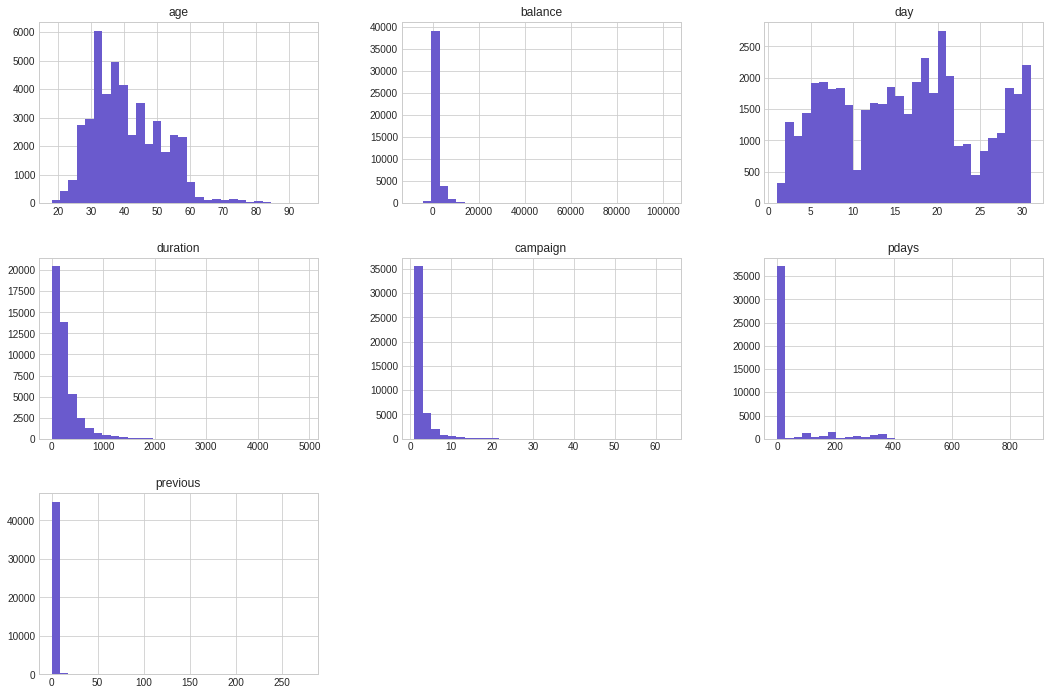

In [ ]:
plt.style.use('seaborn-whitegrid')

raw_df.hist(bins=30, figsize=(18,12), color='slateblue')
plt.show()

## 1.3 Categorical Feature Overview

Next we extract the non-numeric types of features and first visualise them for subsequent study.

In [ ]:
categ_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

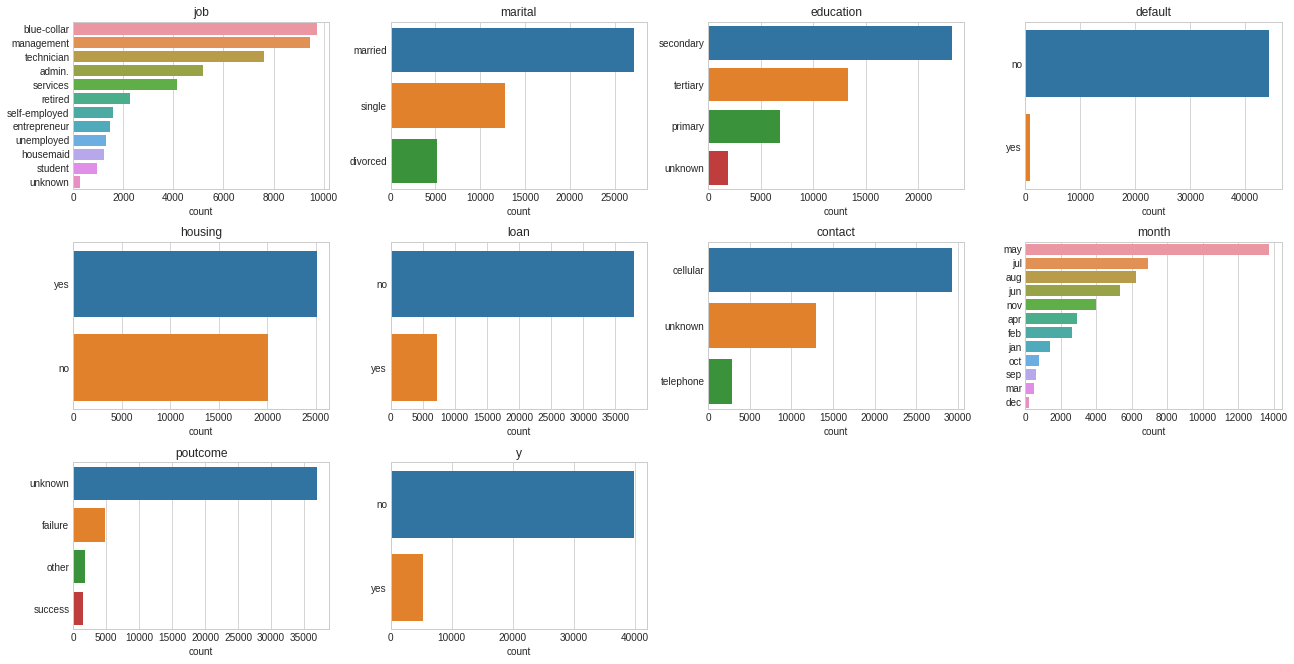

In [ ]:
plt.figure(figsize=(18,12))
for i,col in enumerate(categ_columns,start=1):
    plt.subplot(4,4,i)
    sns.barplot(x=raw_df[col].value_counts().values, y=raw_df[col].value_counts().index)
    plt.title(col)
    plt.xlabel('count')
plt.tight_layout()

## 1.4 Combined or Certain Feature Overview

### Date (Day and Month)

We tried to find a pattern in the distribution of dates, but found that the distribution was evenly distributed, except for January, when the data was slightly less. It is possible that time is not a very important influencing factor, but this also requires the use of algorithms and models in subsequent feature selection to decide on the selection of feature attributes.

Text(0.5, 1.0, 'Day and Month')

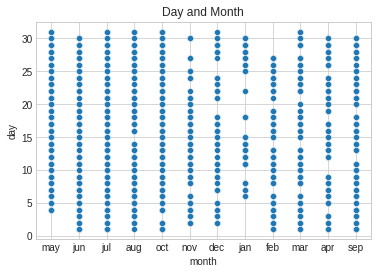

In [ ]:
# Day and Month
d_m = sns.scatterplot(x='month', y='day', data=raw_df, palette="Blues_d")
d_m.set_title("Day and Month")

Further, we examine the date month with the target category. and further found that there was in fact a significant difference from month to month whether or not they were subscribed. This proves that our previous use of scatter plots to examine the impact of dates was biased. The inner circle in the results indicates the percentage of months with a `'y'` value of `'yes'` in the feature column, while the outer circle shows the percentage of months for the `'no'` group.

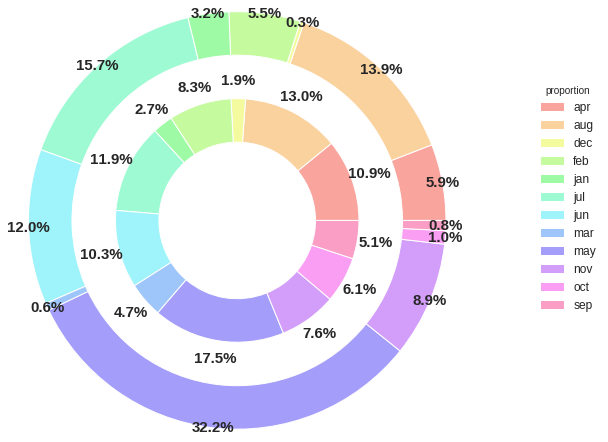

In [ ]:
df_yes = raw_df.loc[raw_df['y']=='yes',]
df_no = raw_df.loc[raw_df['y']=='no',]
def plt_more_category(df,element):
  c = np.unique(np.array(df[element]))
  
  yes = []
  for item in c:
    dff = df_yes.loc[df_yes[element]==item,]
    yes.append(dff.shape[0])
  no = []
  for item in c:
    dff = df_no.loc[df_no[element]==item,]
    no.append(dff.shape[0])

  color = sns.hls_palette(len(c), l=.8, s=.9)

  t = []
  for i in range(len(c)):
    t.append('yes')
  for i in range(len(c)):
    t.append('no')
  tt = []
  for item in yes:
    tt.append(item/df_yes.shape[0])
  for item in no:
    tt.append(item/df_no.shape[0])

  col2 = []
  for item in c:
    col2.append(item)
  for item in c:
    col2.append(item)

  ttt = pd.DataFrame()
  ttt[1]=col2
  ttt[2]=tt
  ttt[3]=t
  
  p = []
  for i in range(len(c)):
    p.append(yes[i]/no[i]-df_yes.shape[0]/df_no.shape[0])

  wedges1, texts1, autotexts1 = plt.pie(
    no,
    autopct = '%3.1f%%',
    radius = 2.4,
    pctdistance = 1.0,
    colors = color,
    wedgeprops = {'width': 0.5, 'edgecolor': 'w'}
  )

  # Inner circle
  wedges2, texts2, autotexts2 = plt.pie(
    yes,
    autopct = '%3.1f%%',
    radius = 1.4,
    pctdistance = 1.15,
    colors = color,
    wedgeprops = {'width': 0.5, 'edgecolor': 'w'}
  )

  plt.legend(wedges1,
    c,
    fontsize = 12,
    title = 'proportion',
    loc = 'center right',
    bbox_to_anchor = (2.2, 0.6))

  # set text properties
  plt.setp(autotexts1, size=15, weight='bold')
  plt.setp(autotexts2, size=15, weight='bold')
  plt.setp(texts1, size=15)

  plt.show()
  
plt_more_category(raw_df,'month')

In addition, the histograms allow for more visualisation of the differences in specific values by month. Thus, visualisation tools can be found to have a significant impact on the decision making for profiling.

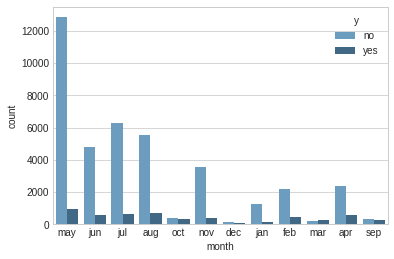

In [ ]:
sns.countplot(
  x='month', 
  hue="y", 
  data=raw_df, 
  palette="Blues_d",
)

### Family Environment(Education & Balance & Marital & Loan)

A person's educational background and marital status can have a significant impact on their savings and therefore on whether or not they will subscribe to a term deposit.

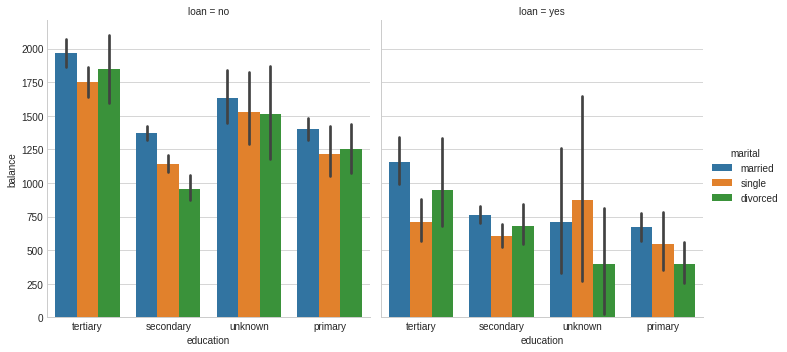

In [ ]:
e_b_m_l = sns.catplot(x="education", y="balance", hue="marital", kind='bar', col="loan", data=raw_df)

## 1.5 Target Overview

In [ ]:
dfs_overview['y']

"no" count       39922
"no" perc       88.30%
"yes" count       5289
"yes" perc      11.70%
counts           45211
uniques              2
missing              0
missing_perc        0%
types             bool
Name: y, dtype: object

([<matplotlib.patches.Wedge at 0x7f036f7d29d0>,
 [Text(-0.7553349599474646, 0.8671615179891012, '"yes" count'),
  Text(0.788175673919586, -0.9048641373385325, '"no" count')],
 [Text(-0.4269284556224799, 0.490134771037318, '11.7%'),
  Text(0.4597691431197584, -0.5278374134474773, '88.3%')])

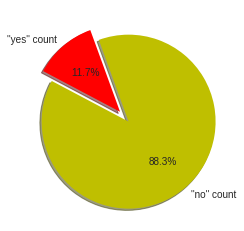

In [ ]:
# defining labels 
genus = ['"yes" count', '"no" count']
yes_num = raw_df['y'].value_counts()['yes']
no_num = raw_df['y'].value_counts()['no']
# portion covered by each label 
slices = [yes_num, no_num]
colors = ['r', 'y']
plt.pie(slices, labels=genus, colors=colors,
    startangle=110, shadow=True, explode=(0.05, 0.1),
    radius=1.0, autopct='%1.1f%%')

It can be seen that the minority class, with 11.7%, is a **moderately imbalanced sample**. And we will discuss this later in **Imbalanced Data Processing**. The following study focuses on the processing of the imbalanced dataset.



# 2.Feature Engineering

The need to numerically manipulate non-numeric types of features was mentioned earlier, and the following ideas are used here for encoding.
- Label Encoding
- One Hot Encoding
- Dummy Variable Trap

Here we only discuss the case where the features are categorical variables and do not consider the case where the feature values are text. On the one hand textual variables do not appear in this dataset, and on the other hand this is a deeper area of research for NLP which we will not discuss in the project.

## 2.1 Label Encoding

Label encoding: Encodes the category of a categorical variable as a number.

Implemented with sklearn.preprocessing.LabelEncoder to encode categorical variables containing k categories as 0, 1, 2, ... (k-1)

Label encoding is generally not used for features, but for target variables.

Suppose a representative feature, `'gender'`, contains two categories: `'male'`, `'female'`. The tag encoding encodes the categories as integers, with 0 representing male and 1 representing female. However, this does not fit the assumptions behind the model as machine learning models assume that the data has an arithmetic meaning, for example 0 < 1, which implies male < female, but this relationship does not hold. Generally a unique hot code would be used to deal with categorical features and the label code would only be used for the categorical target.

So we will apply label encoding only on the target variable column `'y'`:

In [5]:
from sklearn.preprocessing import LabelEncoder

# target varible
y = np.array(raw_df['y']).tolist()
# create LabelEncoder object
le = LabelEncoder()
# fit the data
le.fit(y)
# See what categories are included
print("classes: ", le.classes_)
# encode them into numbers
y_labeled = le.transform(y)
print("encoded labels: ", y_labeled)
# Call inverse_transform for inverse operations
print("inverse encoding: ", le.inverse_transform([0, 1]))
# write into the raw_df
Y = pd.DataFrame(y_labeled,columns=['y'])

classes:  ['no' 'yes']
encoded labels:  [0 0 0 ... 1 0 0]
inverse encoding:  ['no' 'yes']


## 2.2 One Hot Encoding

One hot encoding: transforms a categorical variable containing m categories into a binary matrix of $n \times m$, where $n$ is the number of observations and $m$ is the number of categories.

Suppose the categorical variable `'car_type'`, denoting the type of car, contains the categories `(BMW, Tesla, Audi)`. The one hot encoding will make each category a new variable/feature, with `1` indicating that the observation contains the category and `0` indicating that it does not.

<div align=center><img width=35% src="https://cdn.jsdelivr.net/gh/shimmerjordan/DSML_project_bank_classifying@main/pic/one-hot.png"></div>

Calling `pd.get_dummies` to implement the one hot encoding is more convenient than sklearn's interface because it allows us to manipulate the data frame directly.

By default, `pd.get_dummies` treats variables with data type `'object`' as categorical variables, or you can provide the name of the variable to be coded.

On the other hand, the one hot coding introduces $K$ new features, representing each of the $K$ categories of the categorical variable. **However, this cannot be done if we are using a regression model, as this would lead to multicollinearity.**

## 2.3 Dummy Variable Trap

Here we first extract the list of variable names that do not belong to the numeric type categ_columns. Prefix the dummy variable with the name of the dummy variable (containing only "yes" or "no"). Also we noticed that there are many variables with unknown values in the data, which we choose to discard.

In [6]:
categ_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome']
new_df = raw_df.drop(columns=categ_columns)
for categ_col in categ_columns:
  if categ_col in ['default','housing','loan']:
    c_df = pd.get_dummies(raw_df[categ_col],prefix=categ_col)
  else:
    c_df = pd.get_dummies(raw_df[categ_col])
  if 'unknown' in c_df.columns.tolist():
    c_df = c_df.drop(columns=['unknown'])
  new_df = pd.concat((new_df,c_df),axis=1)
new_df = new_df.drop(columns=['other'],axis=1)
new_df['y'] = Y
new_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 2.4 Feature Crossover

Feature crossover is a way of processing data features, increasing the dimensionality of features by feature combination to seek a better training effect.
In practical scenarios, we often encounter situations where linear classification is not possible in the following samples (it is impossible to draw a straight line to separate the following yellow and blue dots), **so feature combination is a way to let linear models learn non-linear features**.


<div align=center><img width=35% src="https://cdn.jsdelivr.net/gh/shimmerjordan/DSML_project_bank_classifying@main/pic/feature-cross.png"></div>

For example, a large number of feature combinations are used in advertising models, because LR is the most commonly used model in advertising promotion, but LR itself is not complex enough, in order to make LR learn more complex nonlinear features, often using the original features plus feature combinations.

In [7]:
mg_df = pd.DataFrame()
for i in range(len(new_df)):
  mg_df.loc[i,'housing_y_duration'] = new_df.loc[i,'duration']*new_df.loc[i,'housing_yes']
  mg_df.loc[i,'housing_y_age'] = new_df.loc[i,'age']*new_df.loc[i,'housing_yes']
  mg_df.loc[i,'success_duration'] = new_df.loc[i,'duration']*new_df.loc[i,'success']
  mg_df.loc[i,'success_age'] = new_df.loc[i,'age']*new_df.loc[i,'success']
  mg_df.loc[i,'sucess_hy'] = new_df.loc[i,'housing_yes']*new_df.loc[i,'success']
  mg_df.loc[i,'duration_previous'] = new_df.loc[i,'previous']*new_df.loc[i,'duration']
  mg_df.loc[i,'telephone_duration'] = new_df.loc[i,'telephone']*new_df.loc[i,'duration']
  mg_df.loc[i,'duration_balance'] = new_df.loc[i,'balance']*new_df.loc[i,'duration']
  mg_df.loc[i,'duration_age'] = new_df.loc[i,'age']*new_df.loc[i,'duration']
  mg_df.loc[i,'duration_cellular'] = new_df.loc[i,'cellular']*new_df.loc[i,'duration']
mg_df = pd.concat((new_df,mg_df),axis=1)
mg_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,cellular,telephone,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,housing_y_duration,housing_y_age,success_duration,success_age,sucess_hy,duration_previous,telephone_duration,duration_balance,duration_age,duration_cellular
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,261.0,58.0,0.0,0.0,0.0,0.0,0.0,559323.0,15138.0,0.0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,151.0,44.0,0.0,0.0,0.0,0.0,0.0,4379.0,6644.0,0.0
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,76.0,33.0,0.0,0.0,0.0,0.0,0.0,152.0,2508.0,0.0
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,92.0,47.0,0.0,0.0,0.0,0.0,0.0,138552.0,4324.0,0.0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,6534.0,0.0


The following is to deal with the `date`, `mg_df` is the DataFrame containing the synthetic feature, `new_df` is onehot after the DataFrame does not contain the synthetic feature.

In [8]:
date = []
for i in range(len(raw_df)):
  date.append(raw_df.loc[i,'month']+'-'+str(raw_df.loc[i,'day']))
mg_df['date'] = date
mg_df['date'] = LabelEncoder().fit_transform(mg_df['date'])
new_df['date'] = date
new_df['date'] = LabelEncoder().fit_transform(new_df['date'])

# 3.Data Split

To avoid over-optimistic performance, we only do feature selection and imbalanced data processing on the `train_set`.
We use 10% of the whole dataset as test_set, 90% as `train_set`, and we will perform 5-fold cross validation on the `train_set` to tune the parameters.

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(new_df, test_size=0.1)
train_g_set, test_g_set = train_test_split(mg_df, test_size=0.1)

# 4.Feature Selection

By feature selection, we can make the model easier to train and better to perform.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

def select_BestKF(X_train,y_train,K):
  col = X_train.columns.tolist()
  X_train = MinMaxScaler().fit_transform(X_train)
  select_ = SelectKBest(f_classif, k=K).fit(X_train,y_train)
  score = pd.DataFrame(select_.scores_,index=col,columns=['score'])
  score = score.sort_values(by='score',ascending=False)
  select_col = score.index.tolist()[:K]

  return select_col, score[:K]

bestKFs, score = select_BestKF(train_set.drop(['y'], axis=1), train_set['y'], 40)
bestKFs_g, score_g = select_BestKF(train_g_set.drop(['y'], axis=1), train_g_set['y'], 40)

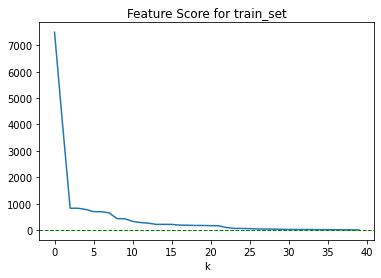

In [11]:
plt.plot(range(len(score)),score)
plt.axhline(0, c='green', ls="--", lw=1)
plt.title('Feature Score for train_set')
plt.xlabel('k')
plt.show()

We first choose `k = 22`, the scores are very colse to $0$, so we may use top 22 features on the pre-processed original dataset `new_df`.

In [12]:
print("selected features:" ,bestKFs[:22])

selected features: ['duration', 'success', 'housing_yes', 'housing_no', 'cellular', 'mar', 'oct', 'sep', 'pdays', 'may', 'previous', 'retired', 'student', 'campaign', 'blue-collar', 'dec', 'single', 'tertiary', 'loan_yes', 'loan_no', 'apr', 'married']


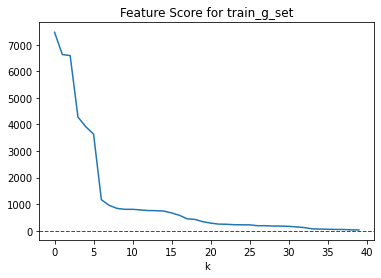

In [13]:
plt.plot(range(len(score_g)),score_g)
plt.axhline(0, c='green', ls="--", lw=1)
plt.title('Feature Score for train_g_set')
plt.xlabel('k')
plt.show()

We choose the value of `k = 32` similarly for the dataset containing the crossed features `mg_df`.

In [14]:
print("selected features:" ,bestKFs_g[:32])

selected features: ['duration', 'duration_age', 'duration_cellular', 'success', 'success_age', 'success_duration', 'duration_balance', 'housing_y_duration', 'duration_previous', 'housing_no', 'housing_yes', 'cellular', 'sucess_hy', 'housing_y_age', 'mar', 'oct', 'sep', 'may', 'pdays', 'previous', 'telephone_duration', 'retired', 'student', 'dec', 'campaign', 'blue-collar', 'loan_yes', 'loan_no', 'tertiary', 'apr', 'single', 'married']


In [15]:
X_train = train_set[bestKFs[:22]]
y_train = train_set['y']
X_test = test_set[bestKFs[:22]]
y_test = test_set['y']

X_g_train = train_g_set[bestKFs_g[:32]]
y_g_train = train_g_set['y']
X_g_test = test_g_set[bestKFs_g[:32]]
y_g_test = test_g_set['y']

X_train_all_feature = train_set.drop(columns=['y'])
X_test_all_feature = test_set.drop(columns=['y'])

`X_train_all_feature` and `X_test_all_feature` here are used in the `knn` method to show the impact of feature selection

# 5.Imbalanced Data Processing

As we mentioned before that the target feature `y` of this dataset are strongly imbalanced, and here we balance the imbalanced dataset after completing the numerical operation of the non-numerical features.

### 5.1 Random undersampling 

There is also a method available in the `imblearn` library for undersampling, `under_sampling.RandomUnderSampler`, which we can use to bring in the method and call it. As can be seen, the original sample of `'no'` has 39922, and after undersampling it becomes the same number as `'yes'`, achieving a 50%/50% category distribution.

In [16]:
# import relative methods
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def RandomUnderSampler_imbc(X, y):
  # splite X and y
  X_train = X
  y_train = y
  # calculate the current category share
  print("Before undersampling: ", Counter(y_train))
  # Calling methods for undersampling
  undersample = RandomUnderSampler(sampling_strategy='majority')
  # Obtaining undersampled samples
  X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
  # calculate percentage of categories after undersampling
  print("After undersampling: ", Counter(y_train_under))
  return X_train_under, y_train_under

#RandomUnderSampler_imbc(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## 5.2 Oversampling with SMOTE

Among the oversampling techniques, SMOTE(Synthetic Minority Oversampling Technique) is considered as one of the most popular data sampling algorithms, which is based on a modified version of the random oversampling algorithm. Since random oversampling only adopts the strategy of simply copying samples for sample augmentation, this way leads to a more immediate problem of overfitting. Therefore, the basic idea of SMOTE is to analyze a few classes of samples and synthesize new samples to add to the dataset.


> The algorithm flow is as follows.
>
> (1) For each sample x in the minority class, calculate its distance to all samples in the minority class sample set in terms of Euclidean distance to obtain its k-nearest neighbors.
>
> (2) Set a sampling ratio according to the sample imbalance ratio to determine the sampling multiplicity N. For each sample x in the minority class, select a number of samples at random from its k-nearest neighbors, assuming the selected nearest neighbors are xn.
>
> (3) For each randomly selected nearest neighbor xn, construct a new sample with the original sample according to the following formula, respectively.


In [17]:
from imblearn.over_sampling import SMOTE
def SMOTE_imbc(X, y):
  X_train = X
  y_train = y
  # calculate the current category share
  print("Before undersampling: ", Counter(y_train))
  # Obtaining undersampled samples
  X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
  # calculate percentage of categories after oversampling
  print("After undersampling: ", Counter(y_train_SMOTE))
  return X_train_SMOTE, y_train_SMOTE

#SMOTE_imbc(X_train, y_train)

## 5.3 Combination of undersampling and oversampling (pipeline)

So if we need to use both oversampling and undersampling, how do we do it? It is very simple to use pipeline.

In [18]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
def UandO_imbc_withModel(X_train, y_train, o=0.4, u=0.5):
  #  define the pipeline
  X = X_train
  y = y_train
  over = SMOTE(sampling_strategy=o)
  under = RandomUnderSampler(sampling_strategy=u)
  steps = [('over', over), ('under', under)]
  pipeline = Pipeline(steps=steps)
  return pipeline.fit_resample(X, y)
# UandO_imbc_withModel(X_train, y_train)

## 5.4 Get the best sampling rate

In the above examples, we have sampled 50:50 by default, but this sampling ratio is not optimal, so we introduce a concept called optimal sampling rate, and then we find this optimal point by setting the sampling ratio and sampling grid search method.

In [19]:
from sklearn.svm import SVC
def BestSamplingRate_imbc(X_train, y_train):
  X = X_train
  y = y_train
  over_values = [0.3,0.4,0.5]
  under_values = [0.7,0.6,0.5]
  for o in over_values:
    for u in under_values:
      # define pipeline
      model = SVC()
      over = SMOTE(sampling_strategy=o)
      under = RandomUnderSampler(sampling_strategy=u)
      steps = [('over', over), ('under', under), ('model', model)]
      pipeline = Pipeline(steps=steps)

      # fit with pipline
      out = pipeline.fit(X, y)

      # evaluate pipeline
      score = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
      scores = np.mean(score)
      print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, scores))

      max_o, max_u, max_s = 0, 0, 0
      if scores > max_s: 
        max_o, max_u, max_s = o, u, scores
  return max_o, max_u, max_s

In [ ]:
max_o, max_u, max_s = BestSamplingRate_imbc(X_train, y_train)

SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.850
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.852
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.852
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.852
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.853
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.853
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.853
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.854
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.855


We can see that `Mean ROC AUC` peaks at 0.855 when SMOTE oversampling rate and Random undersampling rate are both 0.5. Thus, we use the best rate `o=0.5` and `u=0.5` to process imbalanced data for the following procedures.

Similarly, `X_train` and `y_train` are the date set without crossed features which `X_g_train` and `y_g_train` contain. `X_train_all_feature` and `X_test_all_feature` here are used in the `knn` method to show the impact of feature selection

In [20]:
X_train, y_train = UandO_imbc_withModel(X_train, y_train, 0.5, 0.5)

In [21]:
X_g_train, y_g_train = UandO_imbc_withModel(X_g_train, y_g_train, 0.5, 0.5)

In [22]:
X_train_all_feature, y_train_all_feature=UandO_imbc_withModel(X_train_all_feature, train_set['y'], 0.5, 0.5)

# 6.Experiment

In [23]:
mccs=[]
mccs_g=[]
mccs_a=[]
models=['KNN','SVM',"DT","RF","AdaBoost"]

## 6.1 K Nearest Neighbor

### Data standardization

For fitting with KNN model, we need to standardlize the data

In [24]:
from sklearn.preprocessing import StandardScaler

standardScaler1 = StandardScaler() 
standardScaler1.fit(X_train) 
X_train_standard = standardScaler1.transform(X_train) 
X_test_standard = standardScaler1.transform(X_test)

standardScaler2 = StandardScaler() 
standardScaler2.fit(X_train_all_feature) 
X_train_all_feature_standard = standardScaler2.transform(X_train_all_feature) 
X_test_all_feature_standard = standardScaler2.transform(X_test_all_feature)  

standardScaler3 = StandardScaler() 
standardScaler3.fit(X_g_train) 
X_g_train_standard = standardScaler3.transform(X_g_train) 
X_g_test_standard = standardScaler3.transform(X_g_test) 

### Parameters tuning with CV

We use 5-fold cross validation to find a proper `k` for KNN model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

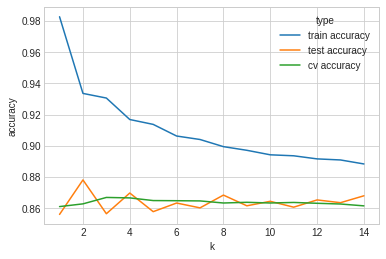

In [ ]:
k_range = range(1,15)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_standard,y_train)
  train_accuracy = knn.score(X_train_standard, y_train)
  test_accuracy = knn.score(X_test_standard, y_test)
  cv_accuracy = np.mean(cross_val_score(knn, X_train_standard, y_train, cv=5, scoring='accuracy'))
  scores.append([k, train_accuracy, test_accuracy, cv_accuracy])

scores = pd.DataFrame(data=scores,columns=['k', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(scores,id_vars=['k'],var_name='type',value_name='accuracy')

sns.lineplot(x='k', y='accuracy', hue='type', data=results)

We can see that after `k=3`, the accuracy rise slowly, so we choose the value 3 as `k` to keep the balance between time and accuracy.

We use all features in knn2 and only selected features in knn1. Later we can see the difference between knn1 and knn2.

In addition, we use knn3 on the `X_g_train` to show the impact of feature generation.

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_standard,y_train)
                                
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_all_feature_standard,y_train_all_feature)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_g_train_standard,y_g_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Evaluation

Define the evaluation function and evaluate

In [27]:
from sklearn.metrics import confusion_matrix
def evaluation(y_test,predict_y):
  conf_matrix = confusion_matrix(y_test.values, predict_y)
  tn, fp, fn, tp = conf_matrix.ravel()
  mcc = (tp*tn - fp*fn)/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))** 0.5)
  print("TN,FP,FN,TP:",tn, fp, fn, tp)
  print("mcc value:",mcc)
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="YlGnBu")
  print("")
  return mcc

selected features:
TN,FP,FN,TP: 3622 364 241 295
mcc value: 0.420541925118684



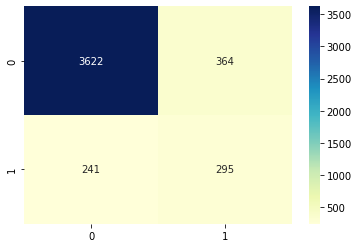

In [28]:
y1_predict = knn1.predict(X_test_standard)
print("selected features:")
mccs.append(evaluation(y_test,y1_predict))

all features:
TN,FP,FN,TP: 3803 183 347 189
mcc value: 0.36080377585363244



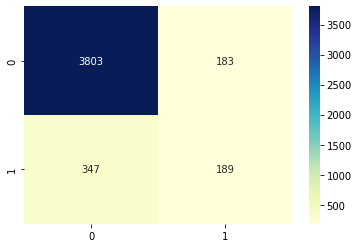

In [29]:
y2_predict = knn2.predict(X_test_all_feature_standard)
print("all features:")
mccs_a.append(evaluation(y_test,y2_predict))

selected features with generated features:
TN,FP,FN,TP: 3687 289 259 287
mcc value: 0.44267469605764503



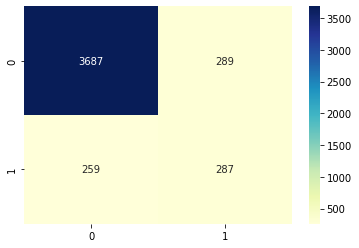

In [30]:
y3_predict = knn3.predict(X_g_test_standard)
print("selected features with generated features:")
mccs_g.append(evaluation(y_g_test,y3_predict))

We drop some features to reduce the time of model training, and mcc value also gets better.

## 6.2 Support Vector Machine

Because we also need to standardize the data, we directly use `X_train_standard` and `X_test_standard`.

Tune the parameters. First we focus on `C`.

In [31]:
from sklearn import svm

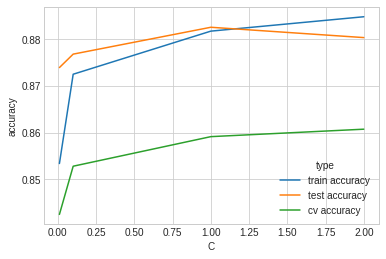

In [ ]:
Cs = [0.01, 0.1, 1, 2]
scores = []
for c in Cs:
  svc = svm.SVC(kernel='rbf', C=c)    
  svc.fit(X_train_standard,y_train)
  train_accuracy = svc.score(X_train_standard, y_train)
  test_accuracy = svc.score(X_test_standard, y_test)
  cv_accuracy = np.mean(cross_val_score(svc, X_train_standard, y_train, cv=5, scoring='accuracy'))
  scores.append([c, train_accuracy, test_accuracy, cv_accuracy])

scores = pd.DataFrame(data=scores,columns=['C', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(scores,id_vars=['C'],var_name='type',value_name='accuracy')

sns.lineplot(x='C', y='accuracy', hue='type', data=results)

### Parameters tuning

The possible optimal `C` is 1, we fix this `C` value. Then we look at `gamma`.

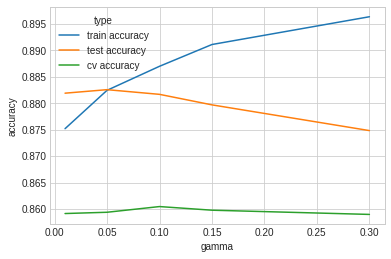

In [ ]:
gammas = [0.01, 0.05, 0.1, 0.15, 0.3]
scores = []
for g in gammas:
    svc = svm.SVC(kernel='rbf', C=1, gamma=g)    
    svc.fit(X_train_standard,y_train)
    train_accuracy = svc.score(X_train_standard, y_train)
    test_accuracy = svc.score(X_test_standard, y_test)
    cv_accuracy = np.mean(cross_val_score(svc, X_train_standard, y_train, cv=5, scoring='accuracy'))
    scores.append([g, train_accuracy, test_accuracy, cv_accuracy])

scores = pd.DataFrame(data=scores,columns=['gamma', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(scores,id_vars=['gamma'],var_name='type',value_name='accuracy')

sns.lineplot(x='gamma', y='accuracy', hue='type', data=results)

The possible optimal gamma is 0.1. Because the two parameters may be interactive, we need to use `GridSearchCV` to find the optimal `C` and `gamma`.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
  'C':np.arange(0.5, 2, 0.5),
  'gamma':np.arange(0.01, 0.08, 0.02), 
}
 
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_standard,y_train)
print("best_params:", grid.best_params_)

best_params: {'C': 1.5, 'gamma': 0.06999999999999999}


### Evaluation

TN,FP,FN,TP: 3721 265 234 302
mcc value: 0.485064053351926



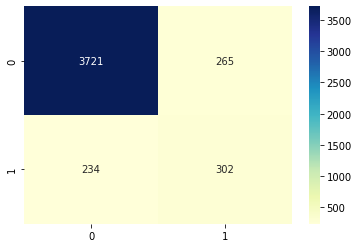

In [32]:
svc1 = svm.SVC(kernel='rbf', C=1.5, gamma=0.07)
svc1.fit(X_train_standard,y_train)
y1_predict = svc1.predict(X_test_standard)
mccs.append(evaluation(y_test,y1_predict))

TN,FP,FN,TP: 3867 119 373 163
mcc value: 0.36659807070017186



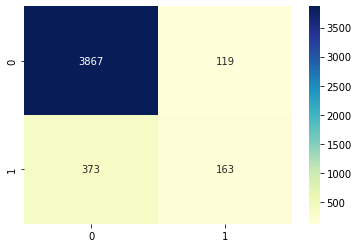

In [34]:
svc2 = svm.SVC(kernel='rbf', C=1.5, gamma=0.07)
svc2.fit(X_train_all_feature_standard,y_train_all_feature)
y2_predict = svc2.predict(X_test_all_feature_standard)
mccs_a.append(evaluation(y_test,y2_predict))

TN,FP,FN,TP: 3781 195 260 286
mcc value: 0.5017431788271114



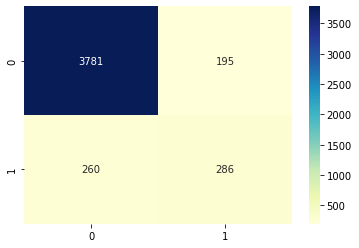

In [35]:
svc3 = svm.SVC(kernel='rbf', C=1.5, gamma=0.07)
svc3.fit(X_g_train_standard,y_g_train)
y3_predict = svc3.predict(X_g_test_standard)
mccs_g.append(evaluation(y_g_test,y3_predict))

## 6.3 Decision Tree

Tune the parameters. First we look at `max_depth`.

In [36]:
from sklearn.tree import DecisionTreeClassifier 

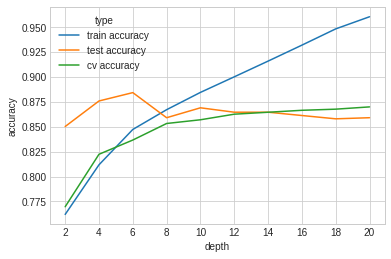

In [ ]:
ds = range(2,21,2)
dt = []
for depth in ds:
  DT = DecisionTreeClassifier(max_depth = depth)
  DT.fit(X_train, y_train)
  train_accuracy = DT.score(X_train, y_train)
  test_accuracy = DT.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy'))
  dt.append([depth, train_accuracy, test_accuracy, cv_accuracy])
dt = pd.DataFrame(data=dt,columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(dt,id_vars=['depth'],var_name='type',value_name='accuracy')

sns.lineplot(x='depth', y='accuracy', hue='type', data=results)
plt.xticks(ds)
plt.show()

Then we look at `min_samples_split` with `max_depth` is 10.

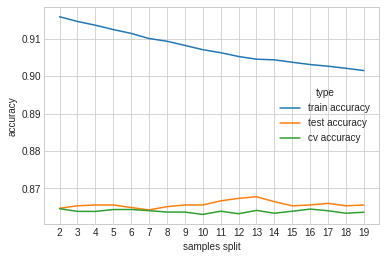

In [ ]:
sss = range(2,20,1)
dt = []
for ss in sss:
  DT = DecisionTreeClassifier(min_samples_split=ss, max_depth=14)
  DT.fit(X_train, y_train)
  train_accuracy = DT.score(X_train, y_train)
  test_accuracy = DT.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy'))
  dt.append([ss, train_accuracy, test_accuracy, cv_accuracy])
dt = pd.DataFrame(data=dt,columns=['samples split', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(dt,id_vars=['samples split'],var_name='type',value_name='accuracy')

sns.lineplot(x='samples split', y='accuracy', hue='type', data=results)
plt.xticks(sss)
plt.show()

Thirdly we look at `min_samples_leaf` with other parameters are fixed.

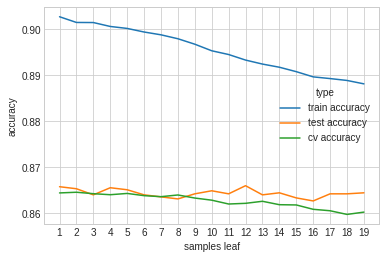

In [ ]:
sls = range(1,20,1)
dt = []
for sl in sls:
  DT = DecisionTreeClassifier(min_samples_leaf=sl, min_samples_split=16, max_depth=14)
  DT.fit(X_train, y_train)
  train_accuracy = DT.score(X_train, y_train)
  test_accuracy = DT.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy'))
  dt.append([sl, train_accuracy, test_accuracy, cv_accuracy])
dt = pd.DataFrame(data=dt,columns=['samples leaf', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(dt,id_vars=['samples leaf'],var_name='type',value_name='accuracy')

sns.lineplot(x='samples leaf', y='accuracy', hue='type', data=results)
plt.xticks(sls)
plt.show()

We use `GridSearchCV` to find the optimal value of each other.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':range(8,15,1),
    'min_samples_leaf':range(14,20,1),
    'min_samples_split':range(13,19,1)
}
 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)
print("best_params:", grid.best_params_)

best_params: {'max_depth': 14, 'min_samples_leaf': 14, 'min_samples_split': 14}


### Evaluation

TN,FP,FN,TP: 3640 346 252 284
mcc value: 0.4135652938837087



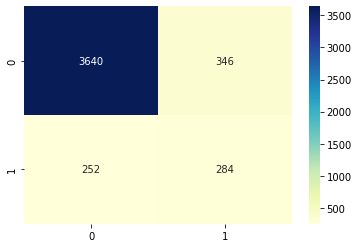

In [37]:
DT1 = DecisionTreeClassifier(min_samples_leaf = 14,min_samples_split = 14, max_depth =14)
DT1.fit(X_train,y_train)
y1_predict = DT1.predict(X_test)
mccs.append(evaluation(y_test,y1_predict))

TN,FP,FN,TP: 3738 248 272 264
mcc value: 0.43897011405001973



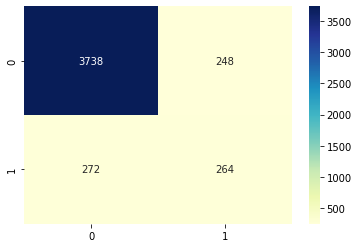

In [38]:
DT2 = DecisionTreeClassifier(min_samples_leaf = 14,min_samples_split = 14, max_depth =14)
DT2.fit(X_train_all_feature,y_train_all_feature)
y2_predict = DT2.predict(X_test_all_feature)
mccs_a.append(evaluation(y_test,y2_predict))

TN,FP,FN,TP: 3786 190 281 265
mcc value: 0.4739315204675663



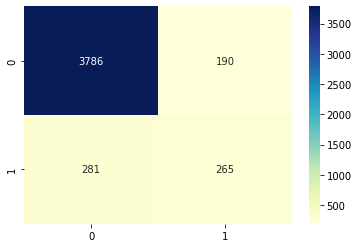

In [39]:
DT3 = DecisionTreeClassifier(min_samples_leaf = 14,min_samples_split = 14, max_depth =14)
DT3.fit(X_g_train,y_g_train)
y3_predict = DT3.predict(X_g_test)
mccs_g.append(evaluation(y_g_test,y3_predict))


## 6.4 Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

First, tune the `max_depth` parameter. 

In [ ]:
rf = []
for depth in range(2, 21, 2):
    RF = RandomForestClassifier(n_estimators=100, max_depth=depth)
    RF.fit(X_train, y_train)
    train_accuracy = RF.score(X_train, y_train)
    test_accuracy = RF.score(X_test, y_test)
    cv_accuracy = np.mean(cross_val_score(RF, X_train, y_train, cv=5))
    rf.append([depth, train_accuracy, test_accuracy, cv_accuracy])
rf = pd.DataFrame(data=rf,columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(rf,id_vars=['depth'],var_name='type',value_name='accuracy')

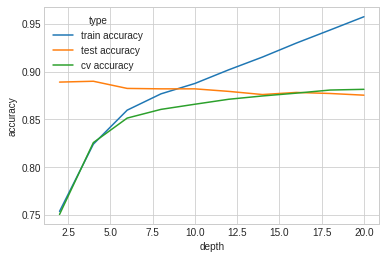

In [ ]:
sns.lineplot(x='depth', y='accuracy', hue='type', data=results)

### Best `max_depth`


Choose the value of max_depth parameter when test accuracy gets the best. Then tune the n_estimators parameter.

In [ ]:
rf = []
for e in range(20, 141, 20):
  RF = RandomForestClassifier(n_estimators=e, max_depth=16)
  RF.fit(X_train, y_train)
  train_accuracy = RF.score(X_train, y_train)
  test_accuracy = RF.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(RF, X_train, y_train, cv=5))
  rf.append([e, train_accuracy, test_accuracy, cv_accuracy])
rf = pd.DataFrame(data=rf,columns=['estimators', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(rf,id_vars=['estimators'],var_name='type',value_name='accuracy')

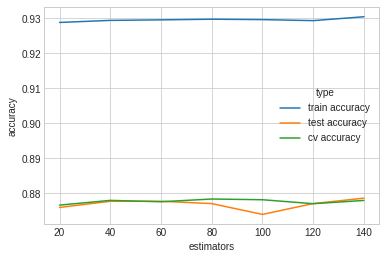

In [ ]:
sns.lineplot(x='estimators', y='accuracy', hue='type', data=results)

### Optimize parameters with `GridSerchCVOptimize`

Make sure the range of each parameters tested before， using GridSerchCV to find the best parameters for this model.

In [ ]:
param_grid = {
    'max_depth': [i for i in range(14,19,1)],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 60, 70, 80],
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
rf_grid.fit(X_train, y_train)
print("best_params:", rf_grid.best_params_)

best_params: {'criterion': 'gini', 'max_depth': 18, 'n_estimators': 80}


TN,FP,FN,TP: 3701 285 223 313
mcc value: 0.4889806378052381



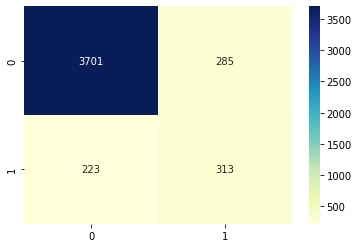

In [41]:
RF1 = RandomForestClassifier(n_estimators=80, max_depth=18, criterion="entropy")
RF1.fit(X_train,y_train)
y1_predict = RF1.predict(X_test)
mccs.append(evaluation(y_test,y1_predict))

TN,FP,FN,TP: 3849 137 304 232
mcc value: 0.47048701921394176



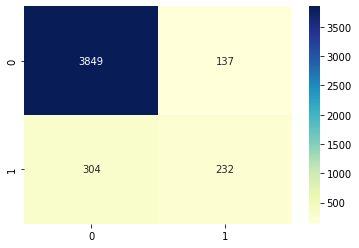

In [42]:
RF2 = RandomForestClassifier(n_estimators=80, max_depth=18, criterion="entropy")
RF2.fit(X_train_all_feature,y_train_all_feature)
y2_predict = RF2.predict(X_test_all_feature)
mccs_a.append(evaluation(y_test,y2_predict))

TN,FP,FN,TP: 3815 161 274 272
mcc value: 0.5067861164878721



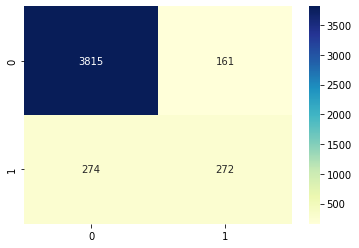

In [43]:
RF3 = RandomForestClassifier(n_estimators=80, max_depth=18, criterion="entropy")
RF3.fit(X_g_train,y_g_train)
y3_predict = RF3.predict(X_g_test)
mccs_g.append(evaluation(y_g_test,y3_predict))

## 6.5 AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

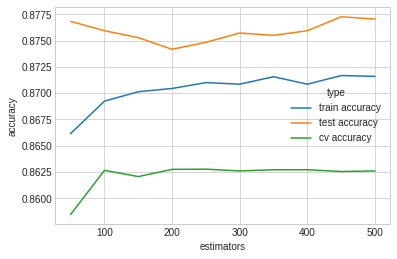

In [ ]:
ab = []
for e in range(50, 550, 50):
  AB = AdaBoostClassifier(n_estimators=e)
  AB.fit(X_train, y_train)
  train_accuracy = AB.score(X_train, y_train)
  test_accuracy = AB.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(AB, X_train, y_train, cv=5))
  ab.append([e, train_accuracy, test_accuracy, cv_accuracy])
ab = pd.DataFrame(data=ab,columns=['estimators', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(ab,id_vars=['estimators'],var_name='type',value_name='accuracy')

sns.lineplot(x='estimators', y='accuracy', hue='type', data=results)

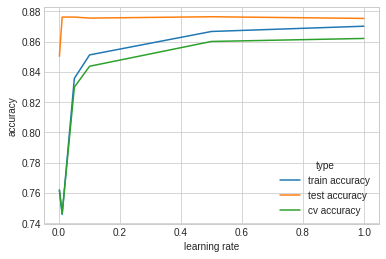

In [ ]:
ab = []
for lr in [0.001,0.01,0.05,0.1,0.5,1]:
  AB = AdaBoostClassifier(n_estimators=150, learning_rate=lr)
  AB.fit(X_train, y_train)
  train_accuracy = AB.score(X_train, y_train)
  test_accuracy = AB.score(X_test, y_test)
  cv_accuracy = np.mean(cross_val_score(AB, X_train, y_train, cv=5))
  ab.append([lr, train_accuracy, test_accuracy, cv_accuracy])
ab = pd.DataFrame(data=ab,columns=['learning rate', 'train accuracy', 'test accuracy', 'cv accuracy'])
results = pd.melt(ab,id_vars=['learning rate'],var_name='type',value_name='accuracy')

sns.lineplot(x='learning rate', y='accuracy', hue='type', data=results)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.6,0.8,1.0,1.2],
    'n_estimators': [150, 175, 200, 225],
}
ab_grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5)
ab_grid.fit(X_train, y_train)
print("best_params:", ab_grid.best_params_)

best_params: {'learning_rate': 1.2, 'n_estimators': 150}


TN,FP,FN,TP: 3701 285 228 308
mcc value: 0.48179243057586957



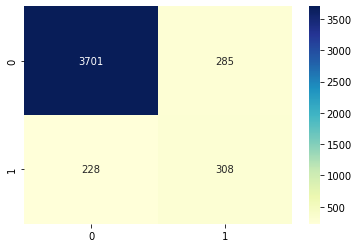

In [45]:
AB1 = AdaBoostClassifier(n_estimators=150, learning_rate=1.2)
AB1.fit(X_train,y_train)
y1_predict = AB1.predict(X_test)
mccs.append(evaluation(y_test,y1_predict))

TN,FP,FN,TP: 3852 134 313 223
mcc value: 0.4584142480262741



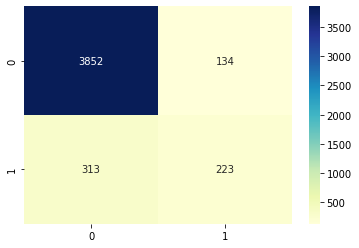

In [46]:
AB2 = AdaBoostClassifier(n_estimators=150, learning_rate=1.2)
AB2.fit(X_train_all_feature,y_train_all_feature)
y2_predict = AB2.predict(X_test_all_feature)
mccs_a.append(evaluation(y_test,y2_predict))

TN,FP,FN,TP: 3823 153 323 223
mcc value: 0.43656302799029784



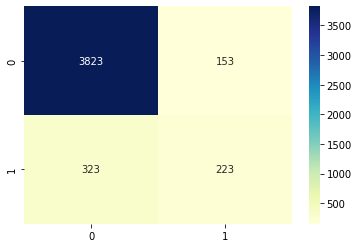

In [47]:
AB3 = AdaBoostClassifier(n_estimators=150, learning_rate=1.2)
AB3.fit(X_g_train,y_g_train)
y3_predict = AB3.predict(X_g_test)
mccs_g.append(evaluation(y_g_test,y3_predict))

# 7.Summary of Achievements

## 7.1 Mcc comparison

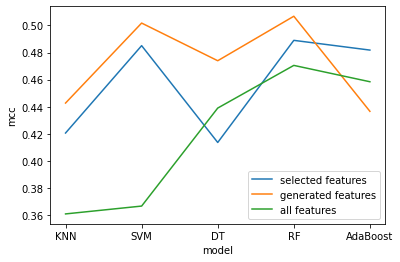

In [48]:
plt.plot(models,mccs, label='selected features')
plt.plot(models,mccs_g, label='generated features')
plt.plot(models,mccs_a, label='all features')
plt.xlabel('model')
plt.ylabel('mcc')
plt.legend()
plt.show()

The data_set with generated features performs better, which means that the intersection of features brings additional information, such as duration_cellular. The data performance after feature selection is also better than the original data, which means that this removes some irrelevant features and reduces the complexity of the model.

## 7.2 Feature Importance

In [49]:
def show_feature_importance(features_list,model):
  importances=model.feature_importances_
  x_values = list(range(len(importances)))
  plt.barh(x_values, importances)
  plt.yticks(x_values, features_list, fontsize=9)

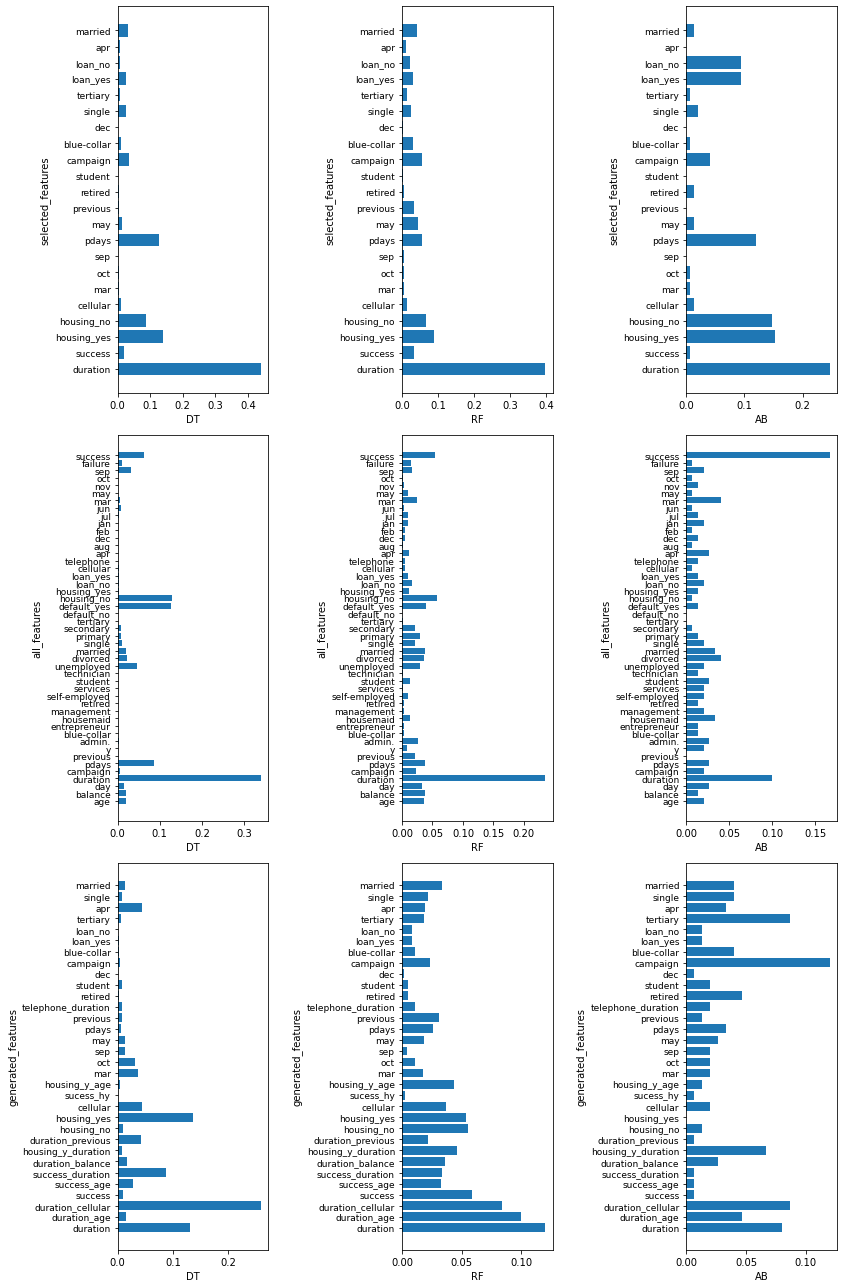

In [50]:
tree_models = [DT1,RF1,AB1,DT2,RF2,AB2,DT3,RF3,AB3]
features_lists=[bestKFs[:22],bestKFs[:22],bestKFs[:22],train_set.columns,train_set.columns,train_set.columns,bestKFs_g[:32],bestKFs_g[:32],bestKFs_g[:32]]
ylabels=['selected_features','selected_features','selected_features','all_features','all_features','all_features','generated_features','generated_features','generated_features']
xlabels=['DT','RF','AB','DT','RF','AB','DT','RF','AB']

plt.figure(figsize=(12,18))
for i in range(1,10):
  plt.subplot(3,3,i)
  show_feature_importance(features_lists[i-1],tree_models[i-1])
  plt.xlabel(xlabels[i-1])
  plt.ylabel(ylabels[i-1])
plt.tight_layout()

## 7.3 Business advice






1.   Duration is very important. People with longer duration are more likely to deposit. In practice, it may be more accurate when combined with cellular.
2.   Housing is equally important. People with houses are more likely to deposit.
3.   pdays, previous, poutcome are more important, so people's history behavior should also be referenced.
4.   People are more likely to deposit in certain months, such as August, September, and December.
5.   In addition, compaign, blue collar, college degree, marriage and loan status are all relatively important and should be collected.



# 8.Future Directions for further Improvements

1.   Make feature selection more precise, and intersect some features that can bring more additional information.
2.   Remove some outliers in the origin date.
3.   Tune the model parameters to be more optimal.
4.   Use other more complex models.

